In [132]:
import nltk
import glob
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Get all of the file names and break up the infomation we get from it

In [193]:
names = glob.glob('..\Data\*')
info = []
for name in g :
    x = name[:-4].replace('..\\Data\\', '')
    x = x.split('.')
    d = {}
    d['id'] = x[0]
    d['sex'] = x[1]
    d['age'] = int(x[2])
    d['topic'] = x[3]
    d['sign'] = x[4]
    d['filename'] = str(name)
    info.append(d)
info

[{'age': 37,
  'filename': '..\\Data\\1000331.female.37.indUnk.Leo.xml',
  'id': '1000331',
  'sex': 'female',
  'sign': 'Leo',
  'topic': 'indUnk'},
 {'age': 17,
  'filename': '..\\Data\\1000866.female.17.Student.Libra.xml',
  'id': '1000866',
  'sex': 'female',
  'sign': 'Libra',
  'topic': 'Student'},
 {'age': 23,
  'filename': '..\\Data\\1004904.male.23.Arts.Capricorn.xml',
  'id': '1004904',
  'sex': 'male',
  'sign': 'Capricorn',
  'topic': 'Arts'},
 {'age': 25,
  'filename': '..\\Data\\1005076.female.25.Arts.Cancer.xml',
  'id': '1005076',
  'sex': 'female',
  'sign': 'Cancer',
  'topic': 'Arts'},
 {'age': 25,
  'filename': '..\\Data\\1005545.male.25.Engineering.Sagittarius.xml',
  'id': '1005545',
  'sex': 'male',
  'sign': 'Sagittarius',
  'topic': 'Engineering'},
 {'age': 48,
  'filename': '..\\Data\\1007188.male.48.Religion.Libra.xml',
  'id': '1007188',
  'sex': 'male',
  'sign': 'Libra',
  'topic': 'Religion'},
 {'age': 26,
  'filename': '..\\Data\\100812.female.26.Archite

### Save it in a csv file for future reference

In [194]:
with open('..\csv\\filenameinfo.csv', 'w', newline='') as f:
    titles = ['id', 'sex', 'age', 'topic', 'sign', 'filename']
    writer = csv.DictWriter(f, fieldnames=titles)
    writer.writeheader()
    for x in info :
        writer.writerow(x)


### Comparing ages of males and females in the sample

In [195]:
df = pd.read_csv('..\csv\\filenameinfo.csv')
grouped = df[['sex', 'age']].groupby('sex')
grouped.describe().unstack()

age                                                   
         count       mean       std   min   25%   50%   75%   max
sex                                                              
female  9660.0  22.741925  8.031138  13.0  16.0  23.0  26.0  48.0
male    9660.0  22.925673  7.918799  13.0  16.0  23.0  26.0  48.0

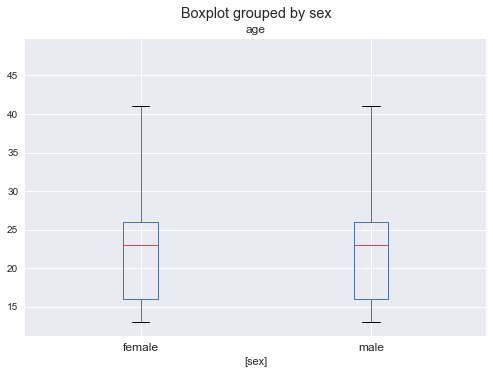

In [134]:
plt.figure()
df[['age', 'sex']].boxplot(by='sex')
plt.show()

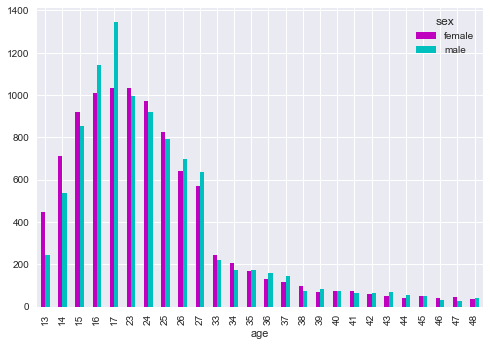

In [135]:
mf = ['m', 'c']

ages = pd.crosstab(df['age'],df['sex']).reindex().plot(kind='bar', color=mf)
plt.show()

In [138]:
stats.ttest_ind(df[df['sex'] == 'male']['age'], df[df['sex'] == 'female']['age'])

Ttest_indResult(statistic=1.60123481444217, pvalue=0.10934127168555047)

### Comparing difference in Male and Female ages across topics

In [157]:
topics = list(df['topic'].unique())

In [166]:
df[['topic', 'sex', 'age']].groupby(['topic', 'sex']).describe().unstack()

age                                           \
                              count       mean        std   min    25%   50%   
topic                sex                                                       
Accounting           female    74.0  27.283784   7.204489  15.0  24.00  25.0   
                     male      31.0  24.645161   5.896600  15.0  23.00  25.0   
Advertising          female    75.0  27.200000   6.614889  13.0  23.00  24.0   
                     male      70.0  27.528571   6.298657  15.0  24.00  26.0   
Agriculture          female    20.0  25.850000  10.064398  14.0  16.50  23.0   
                     male      16.0  19.500000   4.898979  14.0  16.00  17.0   
Architecture         female    35.0  25.571429   5.735779  15.0  23.00  25.0   
                     male      34.0  26.676471   7.876781  14.0  23.25  25.0   
Arts                 female   419.0  25.076372   8.530491  13.0  17.00  24.0   
                     male     302.0  25.480132   7.844710  14.0  23.00  25.0   
Automotive           female    17.0  25.705882   8.636874  14.0  23.00  24.0   
                     male      37.0  25.675676   7.923432  14.0  23.00  25.0   
Banking              female    47.0  27.297872   5.472917  23.0  24.00  25.0   
                     male      65.0  26.338462   5.056793  13.0  24.00  25.0   
Biotech              female    20.0  28.550000   7.963568  15.0  23.75  26.0   
                     male      37.0  21.405405   6.857516  13.0  16.00  23.0   
BusinessServices     female    81.0  26.382716   7.159902  16.0  23.00  25.0   
                     male      82.0  26.414634   7.426930  14.0  23.00  25.0   
Chemicals            female    23.0  20.565217   7.470098  14.0  16.00  17.0   
                     male      39.0  22.256410   5.998763  13.0  17.00  24.0   
Communications-Media female   209.0  26.349282   5.763572  14.0  24.00  25.0   
                     male     270.0  27.666667   7.688644  13.0  24.00  26.0   
Construction         female    22.0  30.636364   8.375392  23.0  25.00  26.0   
                     male      33.0  29.939394   9.604489  15.0  24.00  27.0   
Consulting           female    73.0  31.178082   8.500560  14.0  25.00  26.0   
                     male     118.0  29.805085   7.978881  13.0  24.00  26.5   
Education            female   570.0  25.284211   8.061054  13.0  23.00  25.0   
                     male     410.0  24.539024   8.331734  13.0  17.00  24.0   
Engineering          female    70.0  25.842857   5.970060  15.0  23.00  24.0   
                     male     242.0  25.818182   5.846586  16.0  23.00  25.0   
...                             ...        ...        ...   ...    ...   ...   
Marketing            female   107.0  27.018692   5.487518  16.0  24.00  25.0   
                     male      73.0  28.616438   7.913824  16.0  23.00  25.0   
Military             female    32.0  22.718750   7.684229  13.0  14.75  23.0   
                     male      84.0  24.416667   7.658696  13.0  17.00  23.5   
Museums-Libraries    female    33.0  28.666667   8.436034  15.0  24.00  27.0   
                     male      22.0  30.136364  11.234706  13.0  23.25  26.0   
Non-Profit           female   194.0  25.649485   7.427077  13.0  23.00  25.0   
                     male     178.0  24.488764   8.485440  13.0  17.00  24.0   
Publishing           female    79.0  28.873418   6.764097  17.0  24.00  25.0   
                     male      71.0  29.309859   7.943715  15.0  23.50  26.0   
RealEstate           female    39.0  26.589744   7.133014  13.0  23.00  24.0   
                     male      16.0  25.812500   6.901389  15.0  23.00  24.5   
Religion             female    43.0  27.046512   7.984966  13.0  23.50  26.0   
                     male      96.0  27.718750   9.102577  14.0  23.00  26.0   
Science              female    84.0  26.154762   6.068870  14.0  23.00  25.0   
                     male     100.0  24.750000   5.817728  13.0  23.00  25.0   
Sports-Recreation    female    3

In [183]:
diff = []
print('Topics where the Average Age is Statistically likely to be different between Men and Women')
for t in topics :
    
    value = stats.ttest_ind(df[(df['sex'] == 'male') & (df['topic'] == t)]['age'], 
                    df[(df['sex'] == 'female') & (df['topic'] == t)]['age'])
    if value.pvalue < .05 :
        diff.append(t)
        print(t)
        print(value.pvalue)
        print('--------------------------------------')

Topics where the Average Age is Statistically likely to be different between Men and Women
indUnk
0.0121138640101
--------------------------------------
Technology
0.0280935514982
--------------------------------------
Communications-Media
0.0392093644541
--------------------------------------
Biotech
0.000806544816814
--------------------------------------
Agriculture
0.0271137658721
--------------------------------------
Maritime
0.0352135420272
--------------------------------------


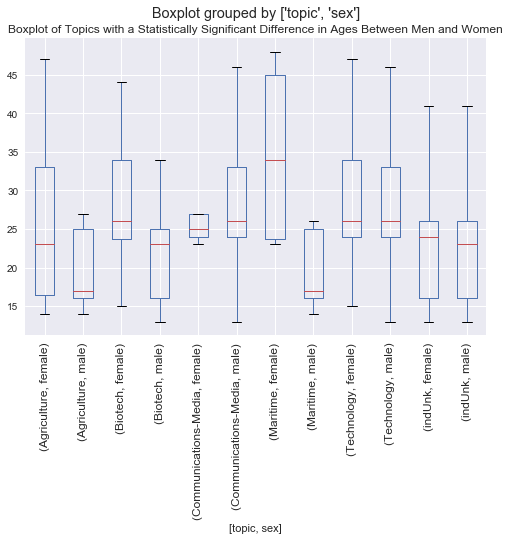

In [179]:
dft = df[df['topic'].isin(diff)].reindex()
dft[['age','topic','sex']].boxplot(by=['topic','sex'],rot=90)
plt.title('Boxplot of Topics with a Statistically Significant Difference in Ages Between Men and Women')
plt.show()

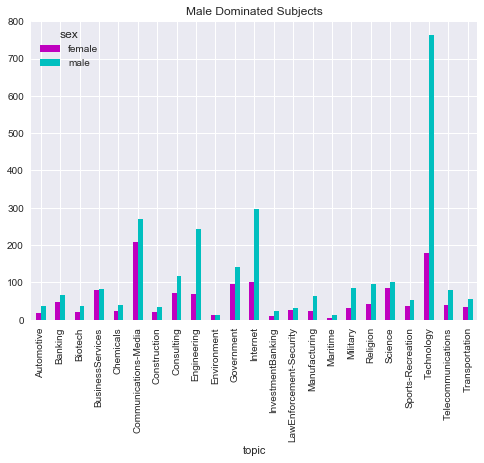

In [131]:
topic = pd.crosstab(df['topic'], df['sex']).reindex()
topic[(topic.index != 'indUnk') & (topic.index != 'Student') & (topic['male'] >= topic['female'])].plot(kind='bar', color=mf)
plt.title('Male Dominated Subjects')
plt.show()

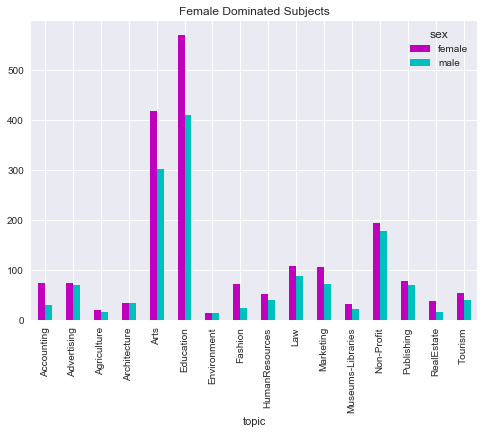

In [124]:
topic[(topic.index != 'indUnk') & (topic.index != 'Student') & (topic['male'] <= topic['female'])].plot(kind='bar', color=mf)
plt.title("Female Dominated Subjects")
plt.show()